<a href="https://colab.research.google.com/github/meenigeprashanthi/codsoft/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task-4 credit card fraud detection

Import all the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
import statsmodels.api as sm
from sklearn import svm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import os
os.chdir("gdrive/My Drive/dsplab")

LOADING THE DATA

In [ ]:
import csv
data=pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Data Preprocessing

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.shape

(284807, 31)

Checking for null values

In [ ]:
data.isnull().sum()       #there is no null values present in the data

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: >

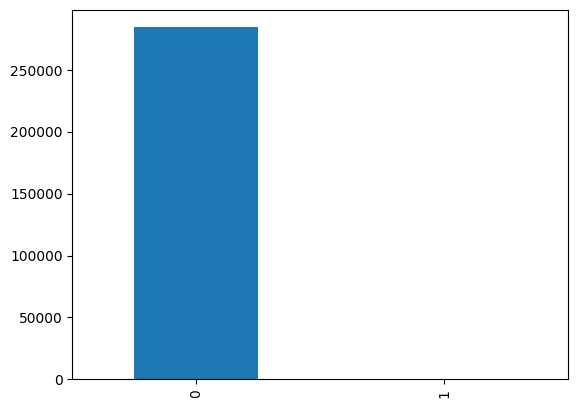

In [ ]:
data['Class'].value_counts().plot(kind='bar')

In [ ]:
non_fraud=data[data.Class==0]
fraud=data[data.Class==1]

In [ ]:
non_fraud.shape

(284315, 31)

In [ ]:
fraud.shape

(492, 31)

In [ ]:
non_fraud_sample=non_fraud.sample(600)
non_fraud_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2438,2006.0,-0.488941,0.074820,1.654761,0.015232,-0.696471,0.449217,0.552624,0.115481,0.251660,...,0.205118,0.440804,0.083397,-0.404746,0.075272,0.579060,-0.025784,0.032305,168.00,0
239110,149955.0,2.018142,-0.366442,-0.499578,0.363577,-0.410037,-0.202922,-0.544733,-0.074895,1.374563,...,0.161218,0.766801,0.019880,-0.603560,0.025715,-0.175824,0.046412,-0.040711,12.99,0
153061,97824.0,-0.652371,0.767643,1.400788,-0.807942,0.204449,0.253625,0.094701,-0.857801,1.733890,...,0.867608,0.512174,-0.199097,0.680024,-0.207368,0.016579,0.212611,0.158484,50.00,0
23348,32714.0,-0.875169,0.582798,1.136017,0.092122,-0.224204,-0.164641,-0.027022,0.608501,-0.235957,...,0.114695,0.250355,-0.149385,0.039411,-0.208261,0.456510,-0.027796,0.026606,19.95,0
174451,121916.0,-5.835105,-6.201245,-0.613892,-0.452446,6.240556,-4.470649,-5.555205,-2.826454,0.878549,...,0.282416,-2.533049,-2.288921,0.964551,-3.223535,0.343513,2.518653,-0.400472,82.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112447,72653.0,-0.346828,0.813354,0.858520,0.327417,0.016580,0.101173,1.772517,-0.485735,-0.382305,...,0.002232,0.182982,-0.260113,-0.441029,0.356936,-0.355586,-0.188966,-0.249607,179.95,0
269508,163673.0,1.977345,-0.391014,-0.420997,0.162874,-0.603351,-0.364334,-0.630708,0.128011,1.263230,...,-0.101329,-0.241898,0.315782,-0.427108,-0.393923,-0.919861,0.047602,-0.042830,1.00,0
202207,134220.0,-0.828197,1.864569,-1.482483,0.445759,0.942623,-0.656468,0.623820,0.769305,-1.046217,...,0.171077,0.232945,-0.213408,0.552477,0.343108,-0.592813,-0.324167,-0.063197,1.00,0
49284,43989.0,1.230764,0.185381,0.024194,0.729240,0.449816,0.623756,-0.087707,0.068434,-0.198610,...,-0.107018,-0.331107,-0.234894,-1.380926,0.643324,-0.396800,0.030014,0.012139,36.00,0


In [ ]:
new_data=pd.concat([non_fraud_sample,fraud],axis=0)
new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2438,2006.0,-0.488941,0.074820,1.654761,0.015232,-0.696471,0.449217,0.552624,0.115481,0.251660,...,0.205118,0.440804,0.083397,-0.404746,0.075272,0.579060,-0.025784,0.032305,168.00,0
239110,149955.0,2.018142,-0.366442,-0.499578,0.363577,-0.410037,-0.202922,-0.544733,-0.074895,1.374563,...,0.161218,0.766801,0.019880,-0.603560,0.025715,-0.175824,0.046412,-0.040711,12.99,0
153061,97824.0,-0.652371,0.767643,1.400788,-0.807942,0.204449,0.253625,0.094701,-0.857801,1.733890,...,0.867608,0.512174,-0.199097,0.680024,-0.207368,0.016579,0.212611,0.158484,50.00,0
23348,32714.0,-0.875169,0.582798,1.136017,0.092122,-0.224204,-0.164641,-0.027022,0.608501,-0.235957,...,0.114695,0.250355,-0.149385,0.039411,-0.208261,0.456510,-0.027796,0.026606,19.95,0
174451,121916.0,-5.835105,-6.201245,-0.613892,-0.452446,6.240556,-4.470649,-5.555205,-2.826454,0.878549,...,0.282416,-2.533049,-2.288921,0.964551,-3.223535,0.343513,2.518653,-0.400472,82.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
x=new_data.drop(['Class'],axis=1)
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2438,2006.0,-0.488941,0.074820,1.654761,0.015232,-0.696471,0.449217,0.552624,0.115481,0.251660,...,0.351436,0.205118,0.440804,0.083397,-0.404746,0.075272,0.579060,-0.025784,0.032305,168.00
239110,149955.0,2.018142,-0.366442,-0.499578,0.363577,-0.410037,-0.202922,-0.544733,-0.074895,1.374563,...,-0.133224,0.161218,0.766801,0.019880,-0.603560,0.025715,-0.175824,0.046412,-0.040711,12.99
153061,97824.0,-0.652371,0.767643,1.400788,-0.807942,0.204449,0.253625,0.094701,-0.857801,1.733890,...,-0.229616,0.867608,0.512174,-0.199097,0.680024,-0.207368,0.016579,0.212611,0.158484,50.00
23348,32714.0,-0.875169,0.582798,1.136017,0.092122,-0.224204,-0.164641,-0.027022,0.608501,-0.235957,...,-0.112182,0.114695,0.250355,-0.149385,0.039411,-0.208261,0.456510,-0.027796,0.026606,19.95
174451,121916.0,-5.835105,-6.201245,-0.613892,-0.452446,6.240556,-4.470649,-5.555205,-2.826454,0.878549,...,-5.250627,0.282416,-2.533049,-2.288921,0.964551,-3.223535,0.343513,2.518653,-0.400472,82.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [ ]:
y=new_data['Class']
y

2438      0
239110    0
153061    0
23348     0
174451    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 1092, dtype: int64

Splitting the data into training data and testing data sets

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.1)
print(x.shape,x_train.shape,x_test.shape)

(1092, 30) (982, 30) (110, 30)


In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

Accuracy on training data

In [ ]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
training_data_accuracy

0.945010183299389

Accuracy on testing data

In [ ]:
x_test_prediction=model.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
testing_data_accuracy

0.9545454545454546

SVM Classifier

In [ ]:
model2=svm.SVC(kernel='linear')
model2.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
x_train_prediction=model2.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
training_data_accuracy

0.9154786150712831

In [ ]:
x_test_prediction=model2.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
testing_data_accuracy

0.9363636363636364